# Impact of different workload types on a single workload

In [1]:
import pandas as pd

from helpers.load_data import (
    get_data_with_cpu,
    get_experiments_paths,
    trim_experiment,
)
from helpers.regression import boxplot_two

experiments_path = '../../data'
dfs = [[] for _ in range(4)]

## Linpack

### Linpack vs Linpack

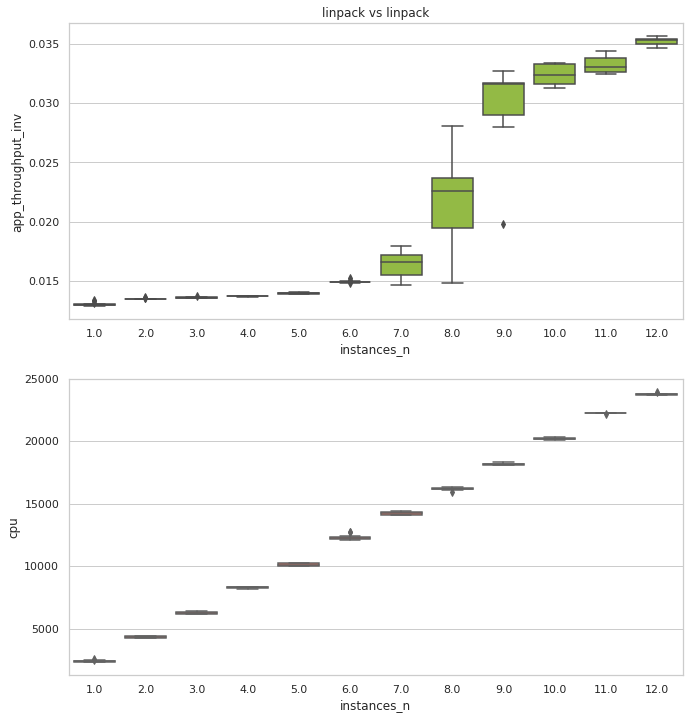

In [3]:
experiment_name = 'puri/linpack_1_linpack_11'
path = next(get_experiments_paths(experiment_name, experiments_path))
df = get_data_with_cpu(path, instances_n=12, cpu_window=30)
df = trim_experiment(df, 12)

dfs[0].append(df)

df_plot = pd.DataFrame()
df_grp = df.groupby('instances_n').mean()
df_plot['linpack'] = df_grp['app_throughput_inv']

boxplot_two(var_1='app_throughput_inv', var_2='cpu', df=df, figsize=(11, 12), title='linpack vs linpack')

### Linpack vs Redis YCSB

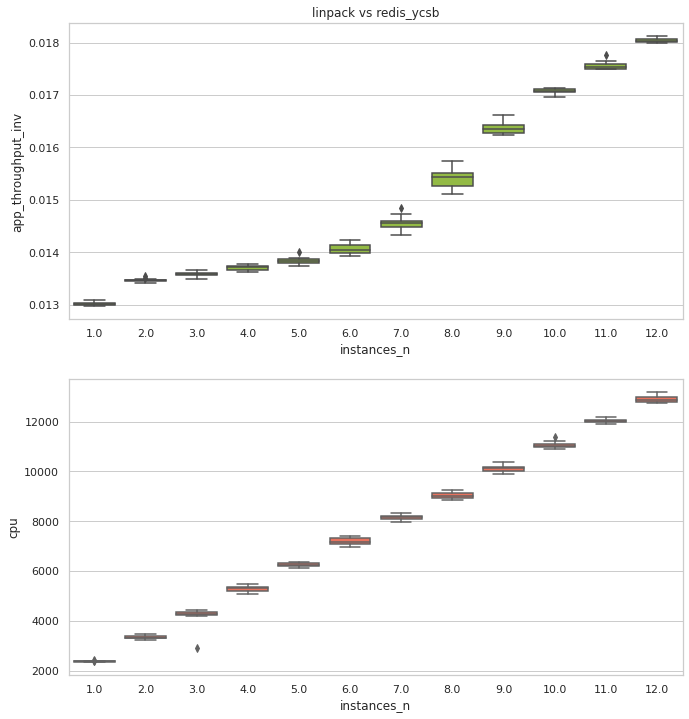

In [4]:
experiment_name = 'puri/linpack_1_redis_ycsb_11'
path = next(get_experiments_paths(experiment_name, experiments_path))
df = get_data_with_cpu(path, instances_n=12, cpu_window=30)
# df = trim_experiment(df, 8)

dfs[0].append(df)

df_grp = df.groupby('instances_n').mean()
df_plot['redis_ycsb'] = df_grp['app_throughput_inv']

boxplot_two(var_1='app_throughput_inv', var_2='cpu', df=df, figsize=(11, 12), title='linpack vs redis_ycsb')

### Linpack vs Hadoop

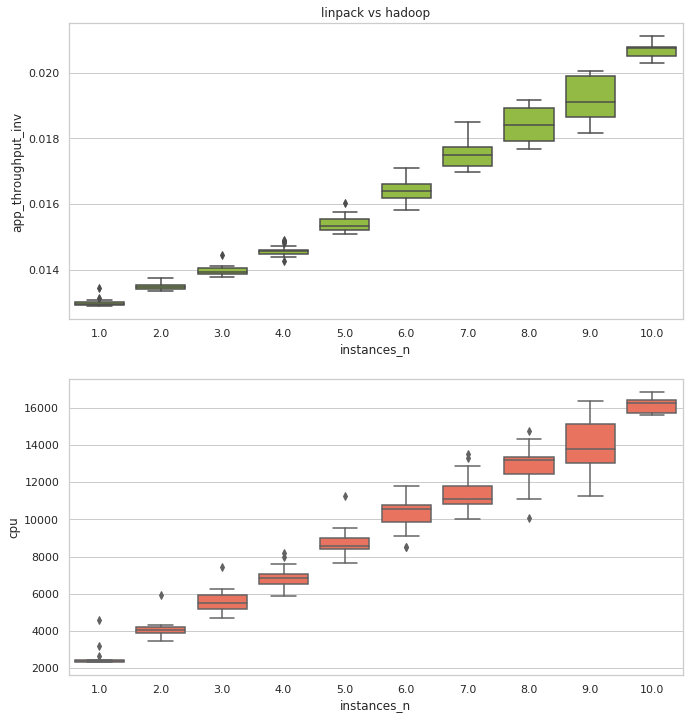

In [5]:
experiment_name = 'puri/linpack_1_hadoop_9'
path = next(get_experiments_paths(experiment_name, experiments_path))
df = get_data_with_cpu(path, instances_n=10, cpu_window=30)

dfs[0].append(df)

df_grp = df.groupby('instances_n').mean()
df_plot['hadoop'] = df_grp['app_throughput_inv']

boxplot_two(var_1='app_throughput_inv', var_2='cpu', df=df, figsize=(11, 12), title='linpack vs hadoop')

### Linpack vs Sysbench

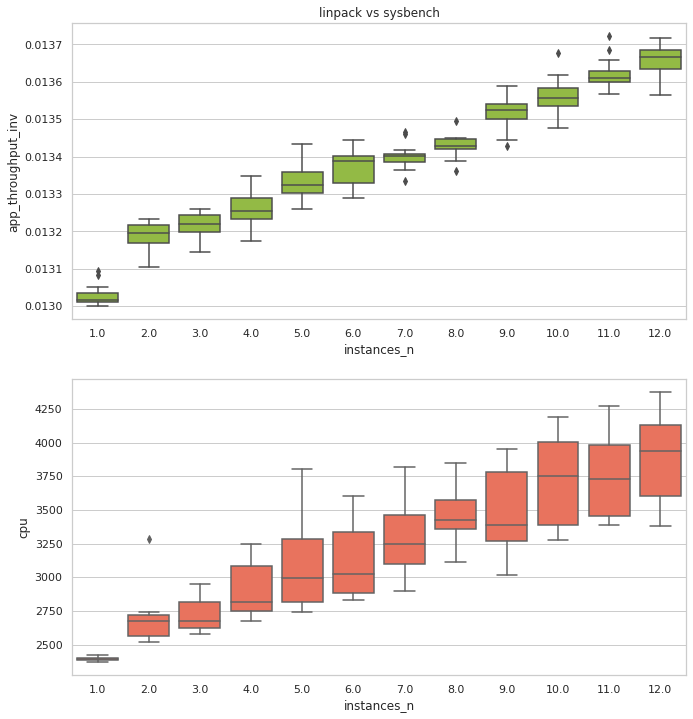

In [6]:
experiment_name = 'puri/linpack_1_sysbench_11'
path = next(get_experiments_paths(experiment_name, experiments_path))
df = get_data_with_cpu(path, instances_n=12, cpu_window=30)
# df = trim_experiment(df, 8)

dfs[0].append(df)

df_grp = df.groupby('instances_n').mean()
df_plot['sysbench'] = df_grp['app_throughput_inv']

boxplot_two(var_1='app_throughput_inv', var_2='cpu', df=df, figsize=(11, 12), title='linpack vs sysbench')

### All

In [7]:
df_plot = df_plot / df_plot.iloc[0].mean()
df_plot = df_plot.reset_index()

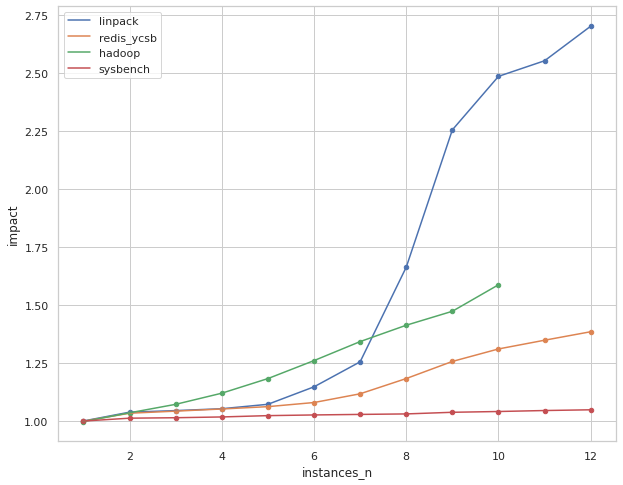

In [8]:
ax = df_plot.plot.scatter(y='linpack', x='instances_n', color='C0', figsize=(10,8))
ax = df_plot.plot.scatter(y='redis_ycsb', x='instances_n', color='C1', figsize=(10,8), ax=ax)
ax = df_plot.plot.scatter(y='hadoop', x='instances_n', color='C2', figsize=(10,8), ax=ax)
ax = df_plot.plot.scatter(y='sysbench', x='instances_n', color='C3', figsize=(10,8), ax=ax)
ax = df_plot.plot(y=['linpack', 'redis_ycsb', 'hadoop', 'sysbench'], x='instances_n', figsize=(10,8), ax=ax, ylabel='impact')

## Redis YCSB

### Redis YCSB vs Linpack

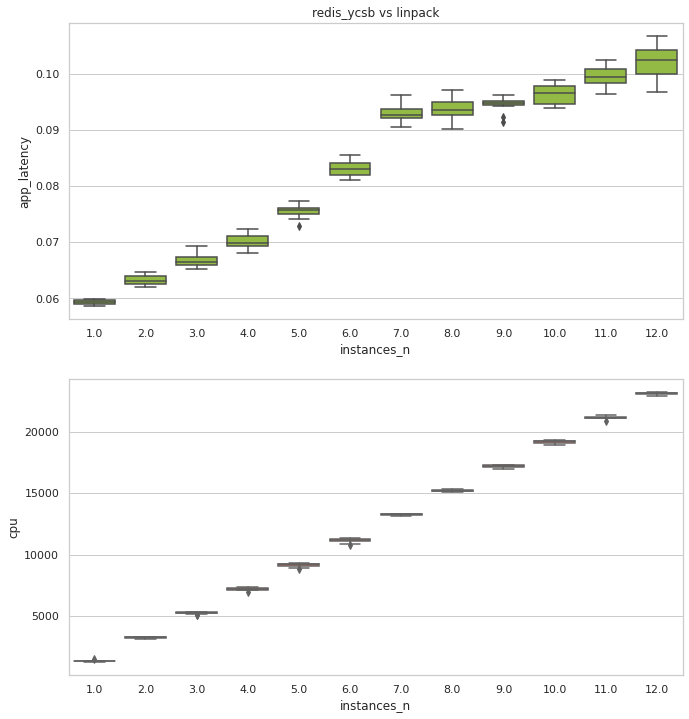

In [9]:
experiment_name = 'puri/redis_ycsb_1_linpack_11'
path = next(get_experiments_paths(experiment_name, experiments_path))
df = get_data_with_cpu(path, instances_n=12, cpu_window=30)

dfs[1].append(df)

df_plot = pd.DataFrame()
df_grp = df.groupby('instances_n').mean()
df_plot['linpack'] = df_grp['app_latency']

boxplot_two(var_1='app_latency', var_2='cpu', df=df, figsize=(11, 12), title='redis_ycsb vs linpack')

### Redis YCSB vs Redis YCSB

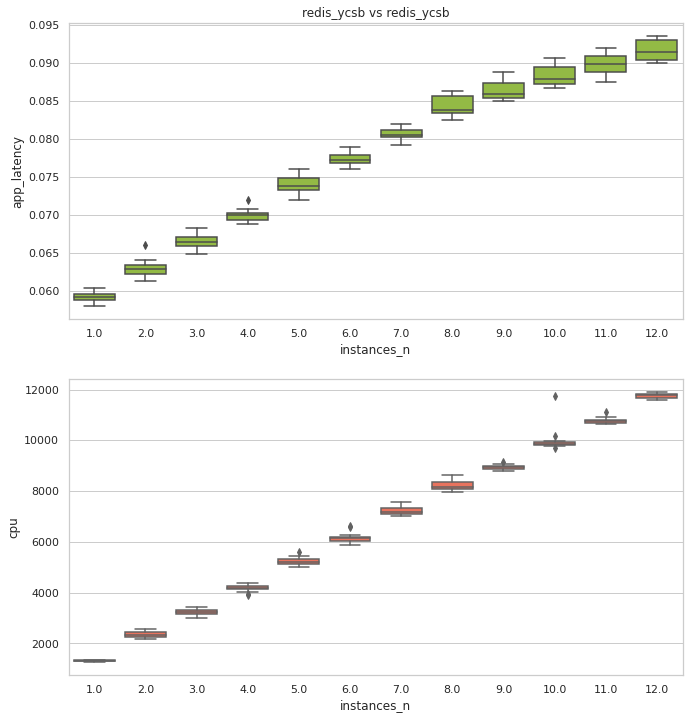

In [10]:
experiment_name = 'puri/redis_ycsb_1_redis_ycsb_11'
path = next(get_experiments_paths(experiment_name, experiments_path))
df = get_data_with_cpu(path, instances_n=12, cpu_window=30)

dfs[1].append(df)

df_grp = df.groupby('instances_n').mean()
df_plot['redis_ycsb'] = df_grp['app_latency']

boxplot_two(var_1='app_latency', var_2='cpu', df=df, figsize=(11, 12), title='redis_ycsb vs redis_ycsb')

### Redis YCSB vs Hadoop

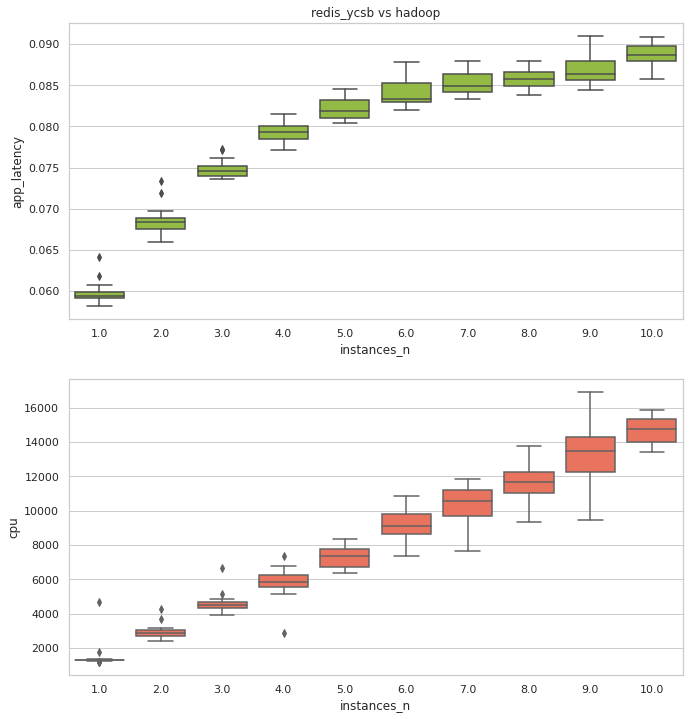

In [11]:
experiment_name = 'puri/redis_ycsb_1_hadoop_9'
path = next(get_experiments_paths(experiment_name, experiments_path))
df = get_data_with_cpu(path, instances_n=10, cpu_window=30)

dfs[1].append(df)

df_grp = df.groupby('instances_n').mean()
df_plot['hadoop'] = df_grp['app_latency']

boxplot_two(var_1='app_latency', var_2='cpu', df=df, figsize=(11, 12), title='redis_ycsb vs hadoop')

### Redis YCSB vs Sysbench

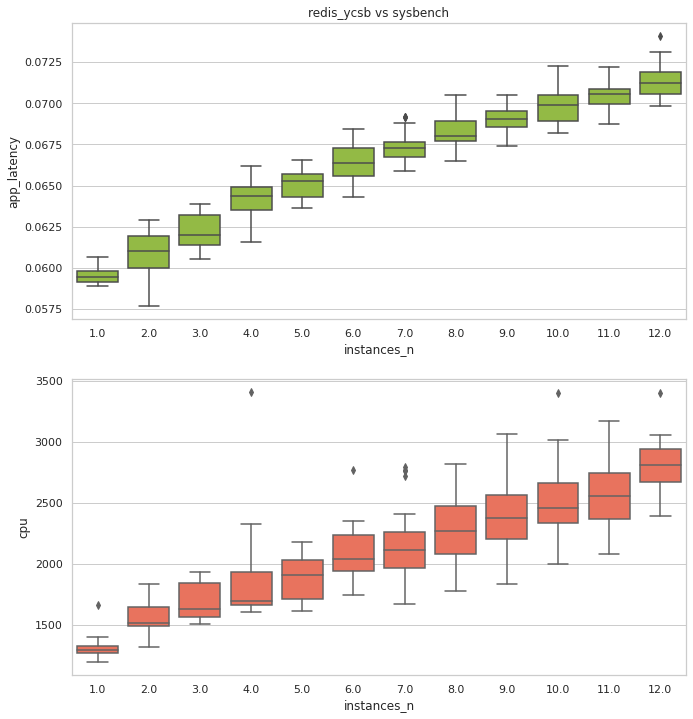

In [12]:
experiment_name = 'puri/redis_ycsb_1_sysbench_11'
path = next(get_experiments_paths(experiment_name, experiments_path))
df = get_data_with_cpu(path, instances_n=12, cpu_window=30)

dfs[1].append(df)

df_grp = df.groupby('instances_n').mean()
df_plot['sysbench'] = df_grp['app_latency']

boxplot_two(var_1='app_latency', var_2='cpu', df=df, figsize=(11, 12), title='redis_ycsb vs sysbench')

In [ ]:
df_plot = df_plot / df_plot.iloc[0].mean()
df_plot = df_plot.reset_index()

In [ ]:
ax = df_plot.plot.scatter(y='linpack', x='instances_n', color='C0', figsize=(10,8))
ax = df_plot.plot.scatter(y='redis_ycsb', x='instances_n', color='C1', figsize=(10,8), ax=ax)
ax = df_plot.plot.scatter(y='hadoop', x='instances_n', color='C2', figsize=(10,8), ax=ax)
ax = df_plot.plot.scatter(y='sysbench', x='instances_n', color='C3', figsize=(10,8), ax=ax)
ax = df_plot.plot(y=['linpack', 'redis_ycsb', 'hadoop', 'sysbench'], x='instances_n', figsize=(10,8), ax=ax, ylabel='impact')

## Hadoop

### Hadoop vs Linpack

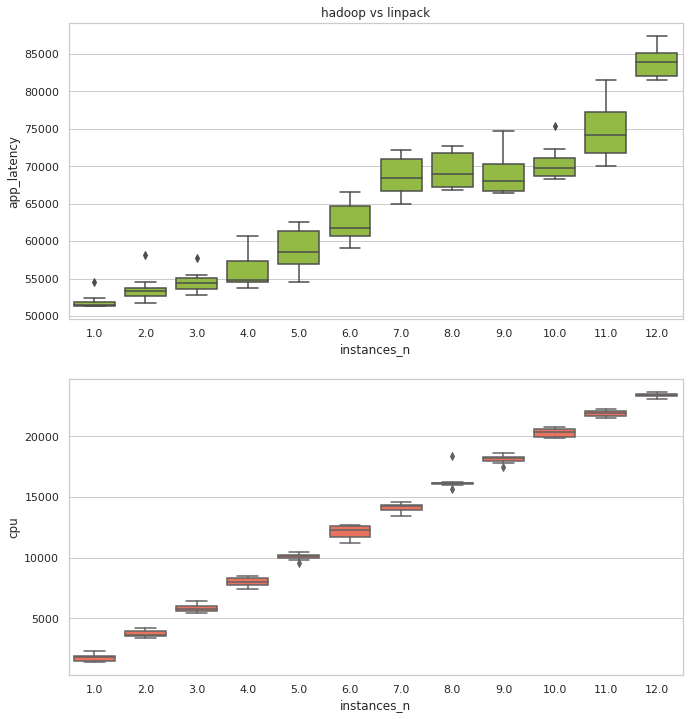

In [13]:
experiment_name = 'puri/hadoop_1_linpack_11'
path = next(get_experiments_paths(experiment_name, experiments_path))
df = get_data_with_cpu(path, instances_n=12, cpu_window=30)

dfs[2].append(df)

df_plot = pd.DataFrame()
df_grp = df.groupby('instances_n').mean()
df_plot['linpack'] = df_grp['app_latency']

boxplot_two(var_1='app_latency', var_2='cpu', df=df, figsize=(11, 12), title='hadoop vs linpack')

### Hadoop vs Redis YCSB

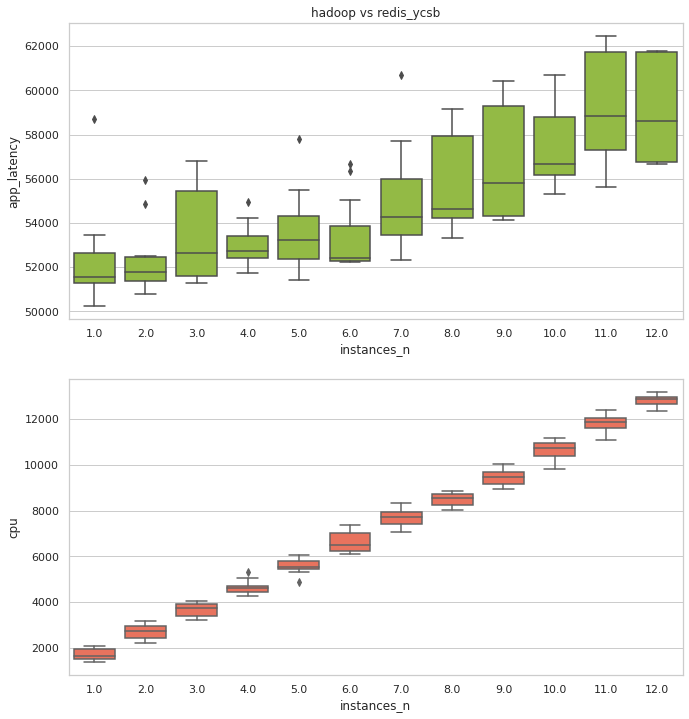

In [14]:
experiment_name = 'puri/hadoop_1_redis_ycsb_11'
path = next(get_experiments_paths(experiment_name, experiments_path))
df = get_data_with_cpu(path, instances_n=12, cpu_window=30)

dfs[2].append(df)

df_grp = df.groupby('instances_n').mean()
df_plot['redis_ycsb'] = df_grp['app_latency']

boxplot_two(var_1='app_latency', var_2='cpu', df=df, figsize=(11, 12), title='hadoop vs redis_ycsb')

### Hadoop vs Hadoop

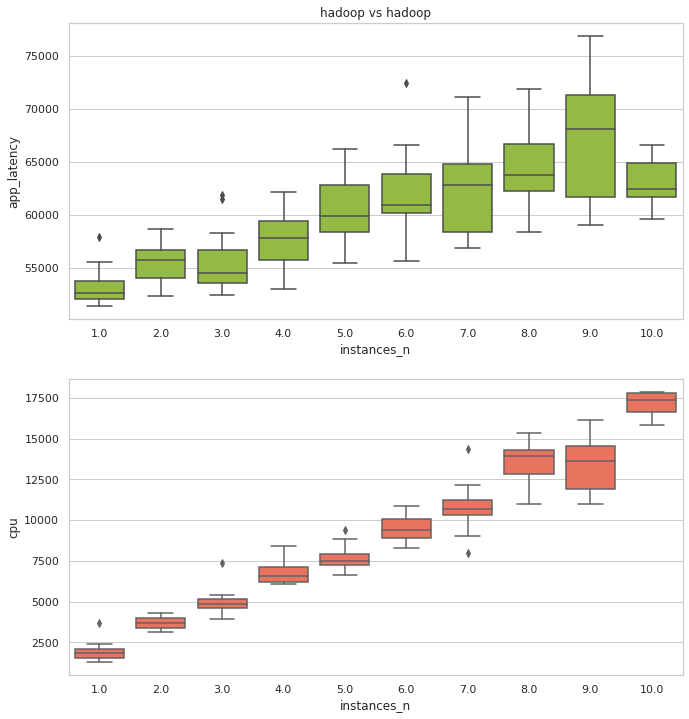

In [15]:
experiment_name = 'puri/hadoop_1_hadoop_9'
path = next(get_experiments_paths(experiment_name, experiments_path))
df = get_data_with_cpu(path, instances_n=10, cpu_window=30)

dfs[2].append(df)

df_grp = df.groupby('instances_n').mean()
df_plot['hadoop'] = df_grp['app_latency']

boxplot_two(var_1='app_latency', var_2='cpu', df=df, figsize=(11, 12), title='hadoop vs hadoop')

### Hadoop vs Sysbench

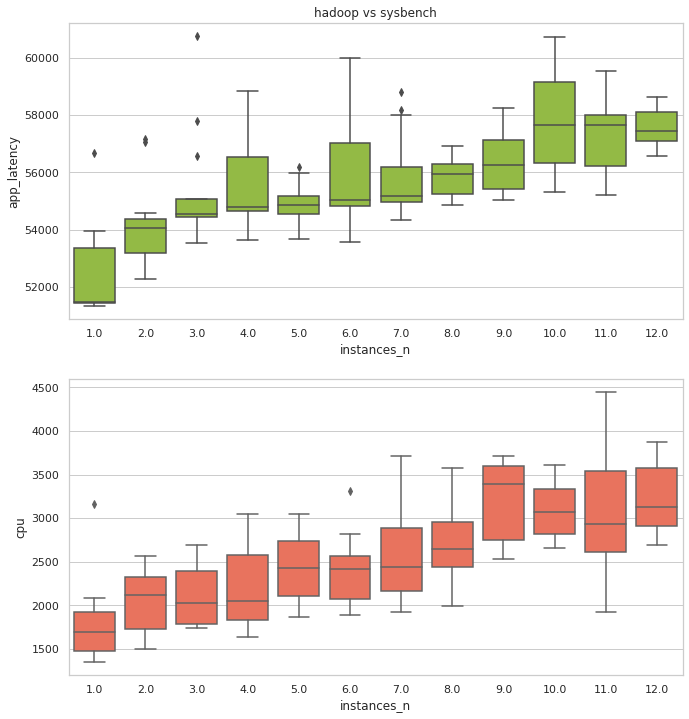

In [16]:
experiment_name = 'puri/hadoop_1_sysbench_11'
path = next(get_experiments_paths(experiment_name, experiments_path))
df = get_data_with_cpu(path, instances_n=12, cpu_window=30)

dfs[2].append(df)

df_grp = df.groupby('instances_n').mean()
df_plot['sysbench'] = df_grp['app_latency']

boxplot_two(var_1='app_latency', var_2='cpu', df=df, figsize=(11, 12), title='hadoop vs sysbench')

In [17]:
df_plot = df_plot / df_plot.iloc[0].mean()
df_plot = df_plot.reset_index()

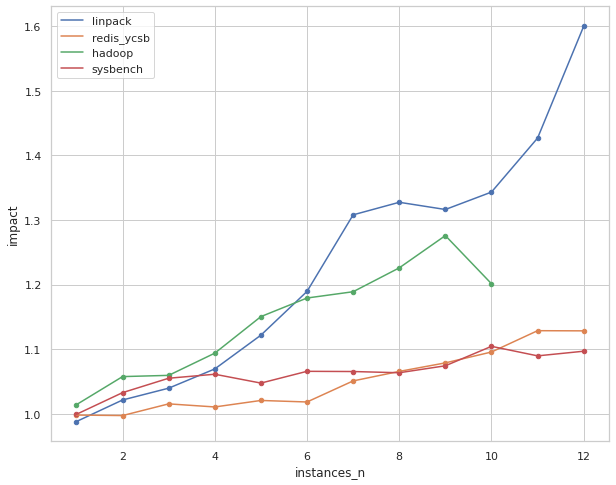

In [18]:
ax = df_plot.plot.scatter(y='linpack', x='instances_n', color='C0', figsize=(10,8))
ax = df_plot.plot.scatter(y='redis_ycsb', x='instances_n', color='C1', figsize=(10,8), ax=ax)
ax = df_plot.plot.scatter(y='hadoop', x='instances_n', color='C2', figsize=(10,8), ax=ax)
ax = df_plot.plot.scatter(y='sysbench', x='instances_n', color='C3', figsize=(10,8), ax=ax)
ax = df_plot.plot(y=['linpack', 'redis_ycsb', 'hadoop', 'sysbench'], x='instances_n', figsize=(10,8), ax=ax, ylabel='impact')

## Sysbench

### Sysbench vs Linpack

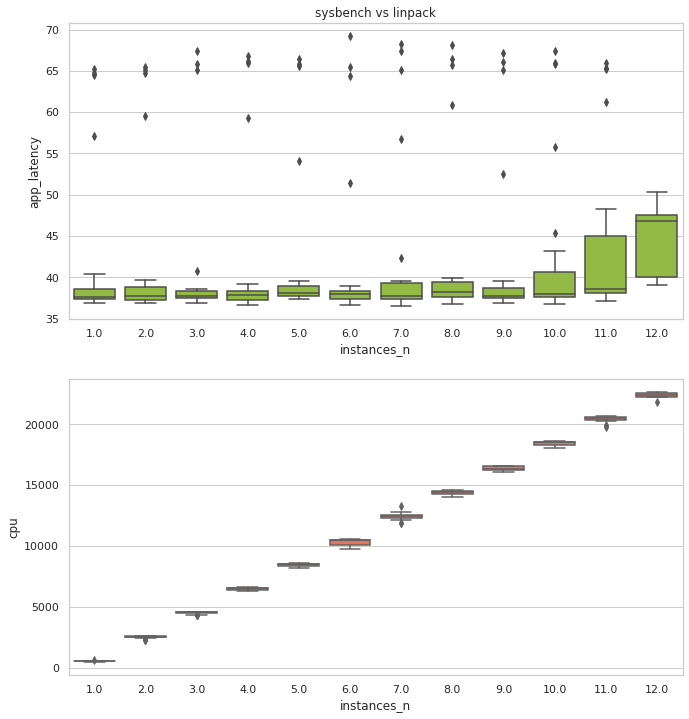

In [19]:
experiment_name = 'puri/sysbench_1_linpack_11'
path = next(get_experiments_paths(experiment_name, experiments_path))
df = get_data_with_cpu(path, instances_n=12, cpu_window=30)

dfs[3].append(df)

df_plot = pd.DataFrame()
df_grp = df.groupby('instances_n').mean()
df_plot['linpack'] = df_grp['app_latency']

boxplot_two(var_1='app_latency', var_2='cpu', df=df, figsize=(11, 12), title='sysbench vs linpack')

### Sysbench vs Redis YCSB

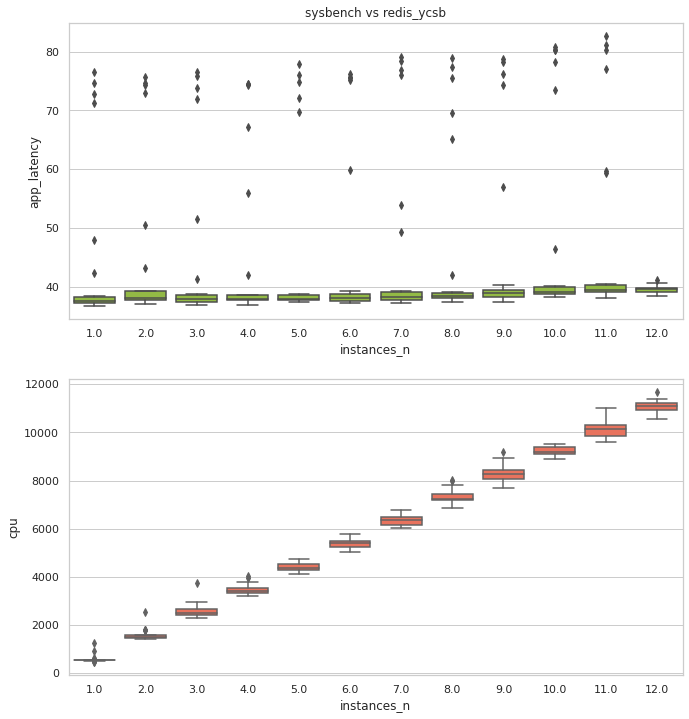

In [20]:
experiment_name = 'puri/sysbench_1_redis_ycsb_11'
path = next(get_experiments_paths(experiment_name, experiments_path))
df = get_data_with_cpu(path, instances_n=12, cpu_window=30)

dfs[3].append(df)

df_grp = df.groupby('instances_n').mean()
df_plot['redis_ycsb'] = df_grp['app_latency']

boxplot_two(var_1='app_latency', var_2='cpu', df=df, figsize=(11, 12), title='sysbench vs redis_ycsb')

### Sysbench vs Hadoop

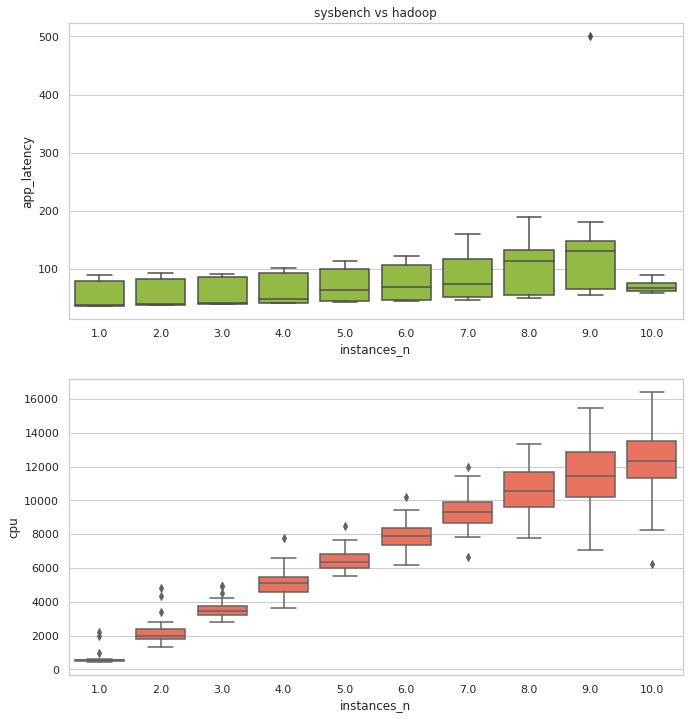

In [21]:
experiment_name = 'puri/sysbench_1_hadoop_9'
path = next(get_experiments_paths(experiment_name, experiments_path))
df = get_data_with_cpu(path, instances_n=10, cpu_window=30)

dfs[3].append(df)

df_grp = df.groupby('instances_n').mean()
df_plot['hadoop'] = df_grp['app_latency']

boxplot_two(var_1='app_latency', var_2='cpu', df=df, figsize=(11, 12), title='sysbench vs hadoop')

### Sysbench vs Sysbench

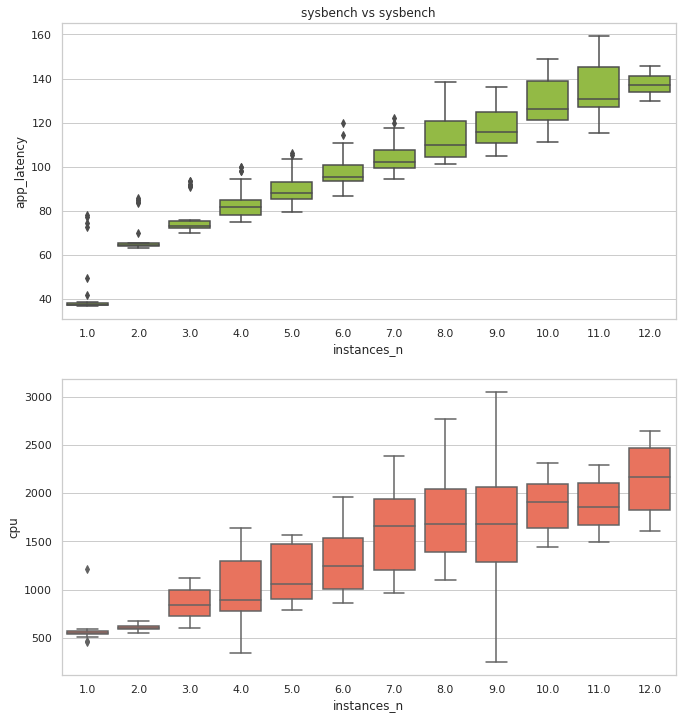

In [22]:
experiment_name = 'puri/sysbench_1_sysbench_11'
path = next(get_experiments_paths(experiment_name, experiments_path))
df = get_data_with_cpu(path, instances_n=12, cpu_window=30)

dfs[3].append(df)

df_grp = df.groupby('instances_n').mean()
df_plot['sysbench'] = df_grp['app_latency']

boxplot_two(var_1='app_latency', var_2='cpu', df=df, figsize=(11, 12), title='sysbench vs sysbench')

In [23]:
df_plot = df_plot / df_plot.iloc[0].mean()
df_plot = df_plot.reset_index()

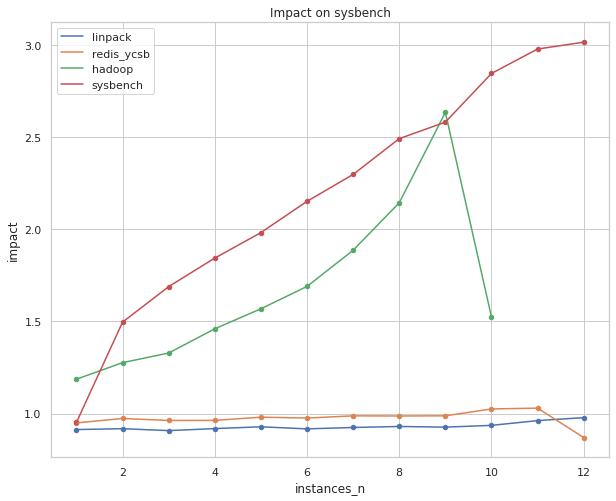

In [24]:
ax = df_plot.plot.scatter(y='linpack', x='instances_n', color='C0', figsize=(10,8))
ax = df_plot.plot.scatter(y='redis_ycsb', x='instances_n', color='C1', figsize=(10,8), ax=ax)
ax = df_plot.plot.scatter(y='hadoop', x='instances_n', color='C2', figsize=(10,8), ax=ax)
ax = df_plot.plot.scatter(y='sysbench', x='instances_n', color='C3', figsize=(10,8), ax=ax)
ax = df_plot.plot(y=['linpack', 'redis_ycsb', 'hadoop', 'sysbench'], x='instances_n', figsize=(10,8), ax=ax, ylabel='impact', title='Impact on sysbench')

## Regression coefficients comparison

In [25]:
from helpers.regression import (
    fit_regression,
    get_coeff,
)

In [27]:
df_coeffs = pd.DataFrame(columns=['impact_on', 'linpack', 'redis_ycsb', 'hadoop', 'sysbench'])

row = {'impact_on': 'linpack'}

for load_name, experiment_name, instances_n, trim_len, target in [
    ('linpack', 'puri/linpack_1_linpack_11', 12, 8, 'app_throughput_inv'),
    ('redis_ycsb', 'puri/linpack_1_redis_ycsb_11', 12, 8, 'app_throughput_inv'),
    ('hadoop', 'puri/linpack_1_hadoop_9', 10, 8, 'app_throughput_inv'),
    ('sysbench', 'puri/linpack_1_sysbench_11', 12, 8, 'app_throughput_inv'),
]:
    path = next(get_experiments_paths(experiment_name, experiments_path))
    coeff = get_coeff(path, instances_n, trim_len, target)
    row[load_name] = coeff

df_coeffs = df_coeffs.append(row, ignore_index=True)
# df_coeffs.iloc[len(df_coeffs) - 1, 1:] /= df_coeffs.at[len(df_coeffs) - 1, df_coeffs.columns[len(df_coeffs)]]

In [28]:
row = {'impact_on': 'redis_ycsb'}

for load_name, experiment_name, instances_n, trim_len, target in [
    ('linpack', 'puri/redis_ycsb_1_linpack_11', 12, 8, 'app_latency'),
    ('redis_ycsb', 'puri/redis_ycsb_1_redis_ycsb_11', 12, 8, 'app_latency'),
    ('hadoop', 'puri/redis_ycsb_1_hadoop_9', 10, 8, 'app_latency'),
    ('sysbench', 'puri/redis_ycsb_1_sysbench_11', 12, 8, 'app_latency'),
]:
    path = next(get_experiments_paths(experiment_name, experiments_path))
    coeff = get_coeff(path, instances_n, trim_len, target)
    row[load_name] = coeff

df_coeffs = df_coeffs.append(row, ignore_index=True)
# df_coeffs.iloc[len(df_coeffs) - 1, 1:] /= df_coeffs.at[len(df_coeffs) - 1, df_coeffs.columns[len(df_coeffs)]]

In [29]:
row = {'impact_on': 'hadoop'}

for load_name, experiment_name, instances_n, trim_len, target in [
    ('linpack', 'puri/hadoop_1_linpack_11', 12, 8, 'app_latency'),
    ('redis_ycsb', 'puri/hadoop_1_redis_ycsb_11', 12, 8, 'app_latency'),
    ('hadoop', 'puri/hadoop_1_hadoop_9', 10, 8, 'app_latency'),
    ('sysbench', 'puri/hadoop_1_sysbench_11', 12, 8, 'app_latency'),
]:
    path = next(get_experiments_paths(experiment_name, experiments_path))
    coeff = get_coeff(path, instances_n, trim_len, target)
    row[load_name] = coeff

df_coeffs = df_coeffs.append(row, ignore_index=True)
# df_coeffs.iloc[len(df_coeffs) - 1, 1:] /= df_coeffs.at[len(df_coeffs) - 1, df_coeffs.columns[len(df_coeffs)]]

/home/godul/.local/lib/python3.7/site-packages/numpy/core/_methods.py:249: RuntimeWarning: invalid value encountered in subtract
  out
/home/godul/.local/lib/python3.7/site-packages/numpy/core/_methods.py:249: RuntimeWarning: invalid value encountered in subtract
  out
/home/godul/.local/lib/python3.7/site-packages/numpy/core/_methods.py:249: RuntimeWarning: invalid value encountered in subtract
  out
/home/godul/.local/lib/python3.7/site-packages/numpy/core/_methods.py:249: RuntimeWarning: invalid value encountered in subtract
  out


In [30]:
row = {'impact_on': 'sysbench'}

for load_name, experiment_name, instances_n, trim_len, target in [
    ('linpack', 'puri/sysbench_1_linpack_11', 12, 8, 'app_latency'),
    ('redis_ycsb', 'puri/sysbench_1_redis_ycsb_11', 12, 8, 'app_latency'),
    ('hadoop', 'puri/sysbench_1_hadoop_9', 10, 8, 'app_latency'),
    ('sysbench', 'puri/sysbench_1_sysbench_11', 12, 8, 'app_latency'),
]:
    path = next(get_experiments_paths(experiment_name, experiments_path))
    coeff = get_coeff(path, instances_n, trim_len, target)
    row[load_name] = coeff

df_coeffs = df_coeffs.append(row, ignore_index=True)
# df_coeffs.iloc[len(df_coeffs) - 1, 1:] /= df_coeffs.at[len(df_coeffs) - 1, df_coeffs.columns[len(df_coeffs)]]

In [31]:
df_coeffs

,impact_on,linpack,redis_ycsb,hadoop,sysbench
0,linpack,0.000832,0.000279,0.000779,0.000052
1,redis_ycsb,0.005190,0.003592,0.003624,0.001285
2,hadoop,2624.261249,467.050814,1595.613681,394.700549
3,sysbench,0.101187,0.214381,6.006579,8.844171


Normalized:

In [49]:
for i in range(4):
    df_coeffs.iloc[i, 1:] /= df_coeffs.at[i, df_coeffs.columns[i + 1]]
df_coeffs

,impact_on,linpack,redis_ycsb,hadoop,sysbench
0,linpack,1.000000,0.335840,0.936758,0.062814
1,redis_ycsb,1.445063,1.000000,1.008927,0.357635
2,hadoop,1.644672,0.292709,1.000000,0.247366
3,sysbench,0.011441,0.024240,0.679157,1.000000


## Box plots comparison

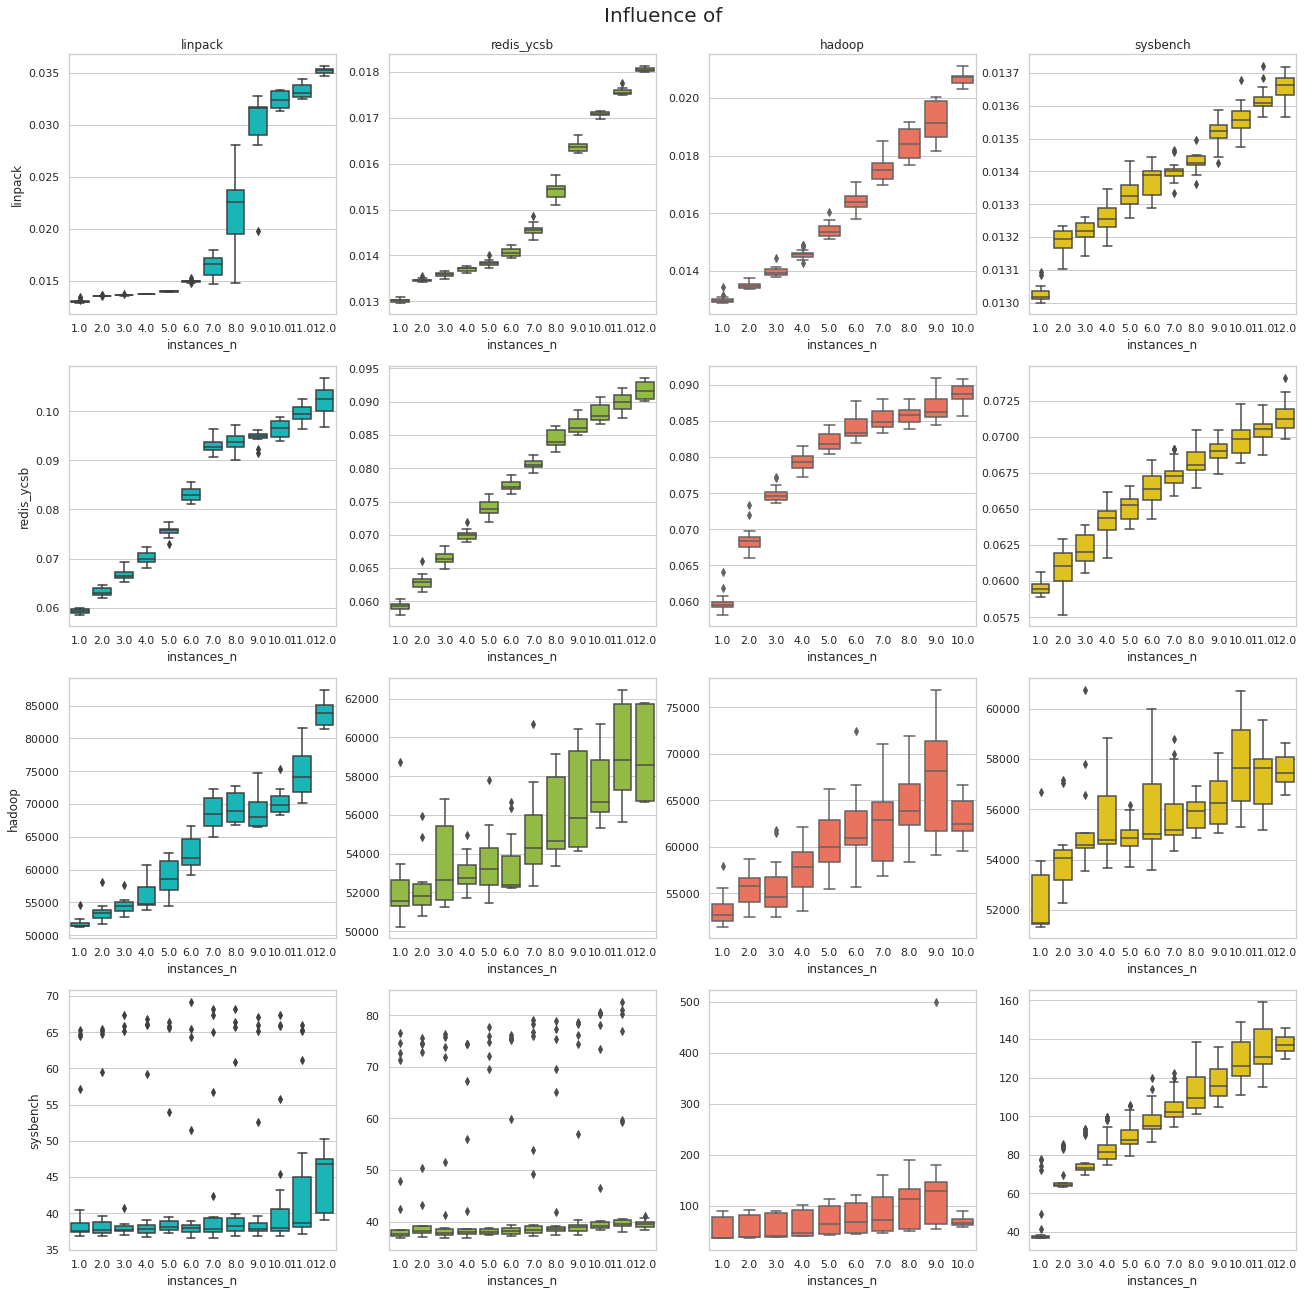

In [50]:
from helpers.regression import boxplot_grid

var_names = [
    ['app_throughput_inv'] * 4,
    ['app_latency'] * 4,
    ['app_latency'] * 4,
    ['app_latency'] * 4,
]

boxplot_grid(var_names=var_names , dfs=dfs, figsize=(22, 22),
             titles=[['linpack', 'redis_ycsb', 'hadoop', 'sysbench']],
             ylabels=[['linpack'], ['redis_ycsb'], ['hadoop'], ['sysbench']],
             suptitle='Influence of')